
## Microsoft machine learning challenge (January 2019)
## Supervised learning/Regression



This project is organized into following parts:

- Introduction
- Exploration data analysis
- Data visualization
- Data preparation
- Building Machine Learning Model
- Evaluating the Model
- Prepare Test Data
- Load and Test the model on Test Data
- Conclusion

## Introduction


### Challenge Overview

In 1998, the Adventure Works Cycles company collected a large volume of data about their existing customers, including demographic features and information about purchases they have made. The company is particularly interested in analyzing customer data to determine any apparent relationships between demographic features known about the customers and the customer purchasing behavior(monthly spending).

In this challenge, we will put into practice the key principles and techniques used into building regression model.

The challenge requires the interpretion of the requirements and necessary tasks to build, test, and optimize the model. After creating the model, we will use the provided test dataset to evaluate the model's performance.



### In this project, I will tackle following :

- Challenge 1: Explore the data and gain some insights into Adventure Works customer characteristics and purchasing behavior.
- Challenge 2: Build a regression model to predict customer purchasing behavior(monthly spending prediction).



### Challenge Instructions

To complete this challenge we will:

- Use the Adventure Works Cycles customer data to create a regression model that predicts the customer purchasing behavior(monthly spending prediction)
- Get the test data. This data includes customer features but does not include average monthly spending values.
- Use the model to predict the corresponding test dataset.

### Datasets description
This data consists of three files, containing data that was collected on January 1st 1998.


AdvWorksCusts.csv
Customer demographic data consisting of the following fields:

- CustomerID (integer): A unique customer identifier.
- Title (string): The customer's formal title (Mr, Mrs, Ms, Miss Dr, etc.)
- FirstName (string): The customer's first name.
- MiddleName (string): The customer's middle name.
- LastName (string): The customer's last name.
- Suffix (string): A suffix for the customer name (Jr, Sr, etc.)
- AddressLine1 (string): The first line of the customer's home address.
- AddressLine2 (string): The second line of the customer's home address.
- City (string): The city where the customer lives.
- StateProvince (string): The state or province where the customer lives.
- CountryRegion (string): The country or region where the customer lives.
- PostalCode (string): The postal code for the customer's address.
- PhoneNumber (string): The customer's telephone number.
- BirthDate (date): The customer's date of birth in the format YYYY-MM-DD.
- Education (string): The maximum level of education achieved by the customer:
- Partial High School
- High School
- Partial College
- Bachelors
- Graduate Degree
- Occupation (string): The type of job in which the customer is employed:
- Manual
- Skilled Manual
- Clerical
- Management
- Professional
- Gender (string): The customer's gender (for example, M for male, F for female, etc.)
- MaritalStatus (string): Whether the customer is married (M) or single (S).
- HomeOwnerFlag (integer): A Boolean flag indicating whether the customer owns their own home (1) or not (0).
- NumberCarsOwned (integer): The number of cars owned by the customer.
- NumberChildrenAtHome (integer): The number of children the customer has who live at home.
- TotalChildren (integer): The total number of children the customer has.
- YearlyIncome (decimal): The annual income of the customer.


 AW_AveMonthSpend.csv
Sales data for existing customers, consisting of the following fields:

- CustomerID (integer): The unique identifier for the customer.
- AveMonthSpend (decimal): The amount of money the customer spends with Adventure Works Cycles on average each month.

AW_BikeBuyer.csv
Sales data for existing customers, consisting of the following fields:

- CustomerID (integer): The unique identifier for the customer.
- BikeBuyer (integer): A Boolean flag indicating whether a customer has previously purchased a bike (1) or not (0).

In [1]:
#Let us start by importing libraries needed  

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#Load training data
Features = pd.read_csv('AdvWorksCusts.csv')
RLabels = pd.read_csv('AW_AveMonthSpend.csv')
CLabels = pd.read_csv('AW_BikeBuyer.csv')
df=pd.concat([Features,RLabels['AveMonthSpend'],CLabels['BikeBuyer']], axis=1, sort=False)

## Exploration Data Analysis (EDA)

### Data exploration

In [3]:
#Chicking on the shape of data
df.shape

(16519, 25)

In [4]:
#Here is how the dataset looks like briefly
df.head()

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,...,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,BikeBuyer
0,11000,NaN,Jon,V,Yang,NaN,3761 N. 14th St,NaN,Rockhampton,Queensland,...,Professional,M,M,1,0,0,2,137947,89,0
1,11001,NaN,Eugene,L,Huang,NaN,2243 W St.,NaN,Seaford,Victoria,...,Professional,M,S,0,1,3,3,101141,117,1
2,11002,NaN,Ruben,NaN,Torres,NaN,5844 Linden Land,NaN,Hobart,Tasmania,...,Professional,M,M,1,1,3,3,91945,123,0
3,11003,NaN,Christy,NaN,Zhu,NaN,1825 Village Pl.,NaN,North Ryde,New South Wales,...,Professional,F,S,0,1,0,0,86688,50,0
4,11004,NaN,Elizabeth,NaN,Johnson,NaN,7553 Harness Circle,NaN,Wollongong,New South Wales,...,Professional,F,S,1,4,5,5,92771,95,1


In [5]:
#Features names exploration
df.columns

Index(['CustomerID', 'Title', 'FirstName', 'MiddleName', 'LastName', 'Suffix',
       'AddressLine1', 'AddressLine2', 'City', 'StateProvinceName',
       'CountryRegionName', 'PostalCode', 'PhoneNumber', 'BirthDate',
       'Education', 'Occupation', 'Gender', 'MaritalStatus', 'HomeOwnerFlag',
       'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren',
       'YearlyIncome', 'AveMonthSpend', 'BikeBuyer'],
      dtype='object')

In [6]:
#Information on feature type( numbers or strings) 
df.dtypes

CustomerID               int64
Title                   object
FirstName               object
MiddleName              object
LastName                object
Suffix                  object
AddressLine1            object
AddressLine2            object
City                    object
StateProvinceName       object
CountryRegionName       object
PostalCode              object
PhoneNumber             object
BirthDate               object
Education               object
Occupation              object
Gender                  object
MaritalStatus           object
HomeOwnerFlag            int64
NumberCarsOwned          int64
NumberChildrenAtHome     int64
TotalChildren            int64
YearlyIncome             int64
AveMonthSpend            int64
BikeBuyer                int64
dtype: object

In [7]:
# info() command informs us on number of entries we got, also the type( int or strings) of each feature in our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16519 entries, 0 to 16518
Data columns (total 25 columns):
CustomerID              16519 non-null int64
Title                   88 non-null object
FirstName               16519 non-null object
MiddleName              9534 non-null object
LastName                16519 non-null object
Suffix                  2 non-null object
AddressLine1            16519 non-null object
AddressLine2            276 non-null object
City                    16519 non-null object
StateProvinceName       16519 non-null object
CountryRegionName       16519 non-null object
PostalCode              16519 non-null object
PhoneNumber             16519 non-null object
BirthDate               16519 non-null object
Education               16519 non-null object
Occupation              16519 non-null object
Gender                  16519 non-null object
MaritalStatus           16519 non-null object
HomeOwnerFlag           16519 non-null int64
NumberCarsOwned         16519

### Data cleaning

This process includes taskes like:

- recoding feature names if needed
- remove duplicates 
- dealing with missing values 
- dealing with outlier 
- drop colums and raws as needed

In [8]:
#Use the following command to see if any duplicates 
print(df.shape)
print(df.CustomerID.unique().shape)

(16519, 25)
(16404,)


In [9]:
# Droping duplicates
df.drop_duplicates(subset = 'CustomerID', keep = 'last', inplace = True)#keep= 'first' or 'last'
print(df.shape)
print(df.CustomerID.unique().shape)

(16404, 25)
(16404,)


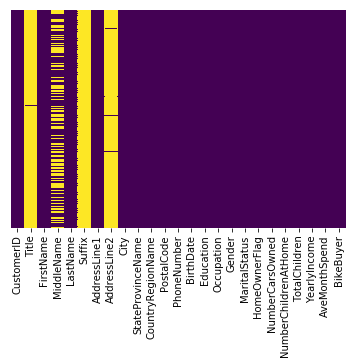

In [10]:
#Dealing with missing value
#(Features.astype(np.object) == 'NaN').any()
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')# Yellow section indicate missing data 

In [11]:
#dropping columns with missing values
df.drop(['Title','MiddleName','Suffix','AddressLine2'],axis=1,inplace=True)

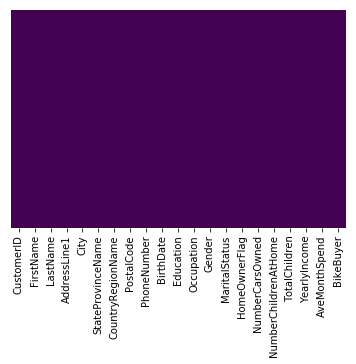

In [12]:
#double checking on the rest of data
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')#No more missing data

### Data Statistics summary

Statistical Overview will brief us on  things like : 

- count
- mean, 
- standard deviation,
- min 
- max
- range



In [13]:
df.describe()

,CustomerID,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,BikeBuyer
count,16404.000000,16404.000000,16404.000000,16404.000000,16404.000000,16404.000000,16404.000000,16404.000000
mean,20240.143136,0.674104,1.499756,0.991100,2.004511,78129.672397,72.391002,0.332541
std,5340.370705,0.468723,1.139135,1.514278,1.682318,39728.383493,27.269921,0.471138
min,11000.000000,0.000000,0.000000,0.000000,0.000000,9482.000000,22.000000,0.000000
25%,15617.750000,0.000000,1.000000,0.000000,0.000000,47808.750000,52.000000,0.000000
50%,20231.500000,1.000000,2.000000,0.000000,2.000000,76125.000000,68.000000,0.000000
75%,24862.250000,1.000000,2.000000,2.000000,3.000000,105211.750000,84.000000,1.000000
max,29482.000000,1.000000,4.000000,5.000000,5.000000,196511.000000,176.000000,1.000000


In [14]:
# Average Monthly spending count
df['AveMonthSpend'].count()

16404

In [15]:
#The minimum average monthly spending
df['AveMonthSpend'].min()

22

In [16]:
#The max average monthly spending
df['AveMonthSpend'].max()

176

In [17]:
#The  average of 'AveMonthSpend' feature
df['AveMonthSpend'].mean()

72.39100219458669

In [18]:
#The median
df['AveMonthSpend'].median()

68.0

In [19]:
#standard deviation
df['AveMonthSpend'].std()

27.26992129964956

In [20]:
#Bikebuyer categories 
#0: did not buy   
#1:Bought the bike

df['BikeBuyer'].unique()

array([0, 1], dtype=int64)

In [21]:
#Bikebuyer  Distribution 
#0: did not buy   
#1:Bought the bike
    
df['BikeBuyer'].value_counts()

0    10949
1     5455
Name: BikeBuyer, dtype: int64

In [22]:
df[['Occupation', 'YearlyIncome']].groupby('Occupation').median()

,YearlyIncome
Occupation,
Clerical,49481.0
Management,118781.0
Manual,21722.0
Professional,99058.0
Skilled Manual,66471.5


In [23]:
#Creating a new column (Feature)
df['Age']=[(1998-int(x[0:4]))for x in df['BirthDate'] ]

In [24]:
#Let us how that age column looks like:
df['Age'].head(5)

0    32
1    33
2    33
3    30
4    30
Name: Age, dtype: int64

In [25]:
# We can also work on selected features to get given information like shown below (name and age of each)
df[['Age','AveMonthSpend']].head()

,Age,AveMonthSpend
0,32,89
1,33,117
2,33,123
3,30,50
4,30,95


In [26]:
#Checking on dataset entries raw by raw
#bellow is customer number 1 entrie information
#df.loc[0]
df.iloc[0:1]

,CustomerID,FirstName,LastName,AddressLine1,City,StateProvinceName,CountryRegionName,PostalCode,PhoneNumber,BirthDate,...,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,BikeBuyer,Age
0,11000,Jon,Yang,3761 N. 14th St,Rockhampton,Queensland,Australia,4700,1 (11) 500 555-0162,1966-04-08,...,M,M,1,0,0,2,137947,89,0,32


In [27]:
#Age and Yearly-income of the 15th customer on the list can be obtained as follows
df.loc[[15 ],['Age','YearlyIncome']]

,Age,YearlyIncome
15,19,40011


In [28]:
#The list of customers with Graduate degree
df[df['Education']=='Graduate Degree'].head()

,CustomerID,FirstName,LastName,AddressLine1,City,StateProvinceName,CountryRegionName,PostalCode,PhoneNumber,BirthDate,...,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,BikeBuyer,Age
49,11057,Carl,Andersen,6930 Lake Nadine Place,Lane Cove,New South Wales,Australia,1597,1 (11) 500 555-0181,1953-10-12,...,M,M,1,2,0,2,119540,82,0,45
69,11079,Donald,Gonzalez,4236 Malibu Place,Geelong,Victoria,Australia,3220,1 (11) 500 555-0137,1959-03-11,...,M,S,1,2,0,0,172444,87,0,39
70,11080,Damien,Chander,9941 Stonehedge Dr.,Perth,South Australia,Australia,6006,1 (11) 500 555-0111,1959-07-17,...,M,M,1,2,0,0,181590,92,1,39
72,11082,Angela,Butler,6040 Listing Ct,Fremont,California,United States,94536,579-555-0195,1966-08-04,...,F,S,0,3,1,1,149717,62,1,32
73,11083,Alyssa,Cox,867 La Orinda Place,Lincoln Acres,California,United States,91950,561-555-0140,1966-03-15,...,F,M,1,3,1,1,163913,68,1,32


In [29]:
#Age of the youngest customer with a Graduate degree
df[df['Education']=='Graduate Degree']['Age'].min()

20

In [30]:
#Age of the eldest customer with a Graduate degree
df[df['Education']=='Graduate Degree']['Age'].max()

76

In [31]:
#Names of youngest customer with a graduate degree
df[(df['Age']==40)& (Features['YearlyIncome']>=100000)]['FirstName'].head()

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


213    Clarence
214       Mayra
215      Latoya
216        Anne
491       Logan
Name: FirstName, dtype: object

In [32]:
#costomer count by gender
#df['count'] = 1
#df[['Gender', 'count']].groupby('Gender').count()

In [33]:
#Education and Occupation count by respective categories
def count_unique(df, cols):
    for col in cols:
        print('\n' + 'For column ' + col)
        print(df[col].value_counts())

cat_cols = ['Education', 'Occupation']
count_unique(df, cat_cols)


For column Education
Bachelors              4758
Partial College        4451
High School            2944
Graduate Degree        2851
Partial High School    1400
Name: Education, dtype: int64

For column Occupation
Professional      4922
Skilled Manual    4038
Management        2718
Clerical          2597
Manual            2129
Name: Occupation, dtype: int64


In [34]:
#Examin class imbalance
#0: did not buy   
#1:Bought the bike

df['BikeBuyer'].value_counts()

0    10949
1     5455
Name: BikeBuyer, dtype: int64

## Data visualization 

Before creating analytical models, we must develop an understanding of the properties and relationships in a dataset. There are two goals for data exploration and visualization. First to understand the relationships between the data columns. Second to identify features that may be useful for predicting  in machine learning projects. Additionally, redundant, collinear features can be identified so they can be eliminated or otherwise dealt with.

For regression problems we are looking for features that help predict a real numeric value. Thus visually exploring data to determine which features may be useful in predicting customer mounthly spending (amount).

following tool may be used depending on what type of visualization needed:

- 1D plots (bar ,hist+( kde,rug) ) to visualize distribution and frequency  
- 2D plots (scatter,jointplot,violinplot) to visualize relationship between 2 features
- 2D+ plots (regplot= scatter + colors + size) to visualize relationship between more than 2 features
- Multiple axes (pairplot)to visualize relationship between more than 2 features
- Conditioned (FaceGrid)to visualize relationship between more than 2 features

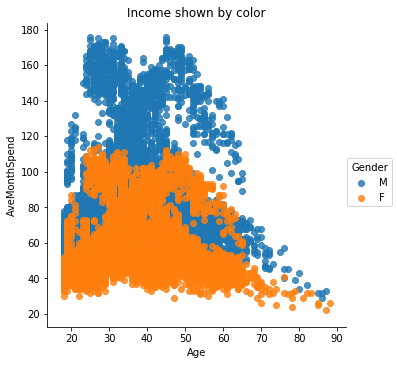

In [35]:
# customers AveMonthSpend by Age and Gender
def plot_Features(df, col1, col2):
    sns.lmplot(x = col1, y = col2, 
               data = df, 
               hue = "Gender", 
               fit_reg = False)
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title('Income shown by color')
    plt.show()
    
plot_Features(df,'Age', 'AveMonthSpend')
#plot_Features(Features, 'Education', 'Age')

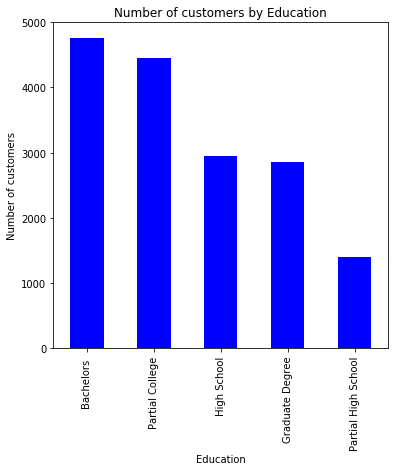

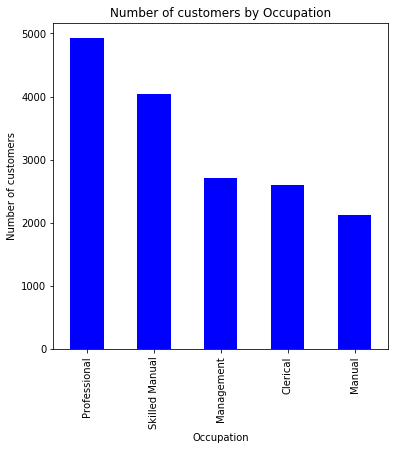

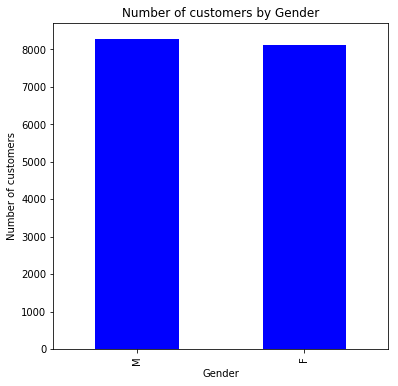

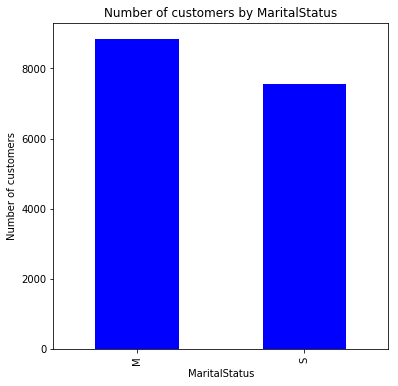

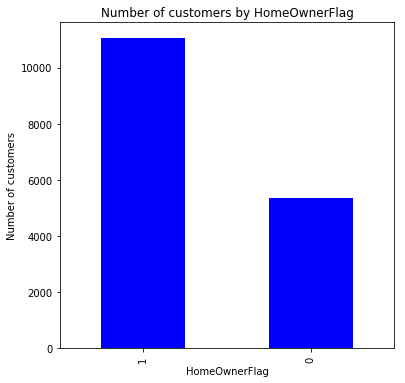

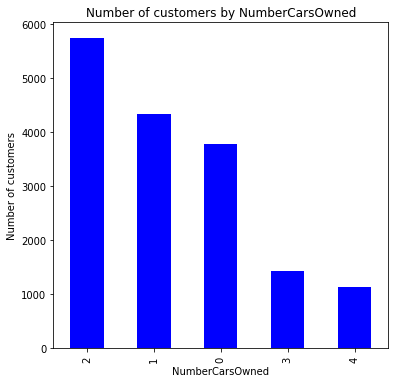

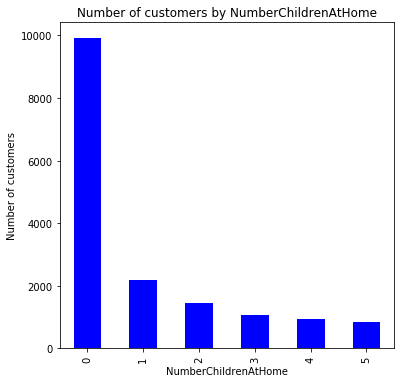

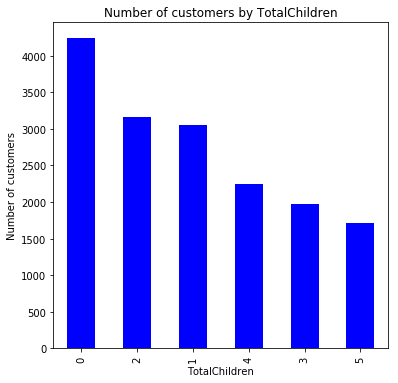

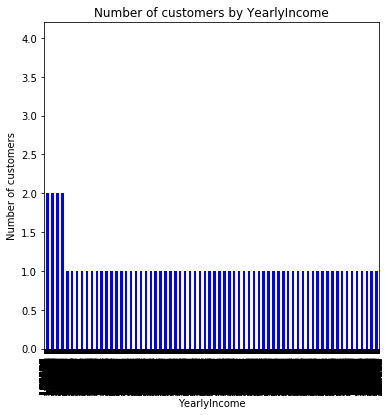

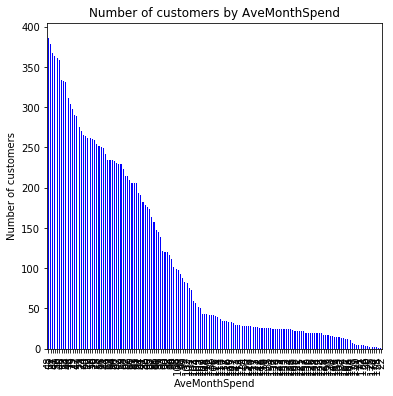

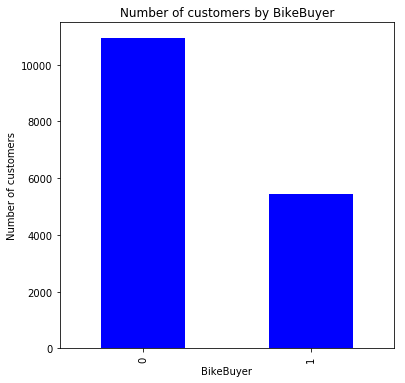

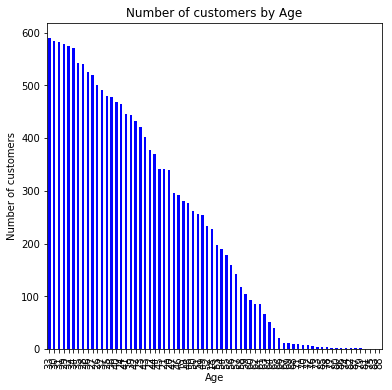

In [36]:
#1D frequancy
def plot_bars(df, cols):
    for col in cols:
        fig = plt.figure(figsize=(6,6)) # define plot area
        ax = fig.gca() # define axis    
        counts = df[col].value_counts()# find the counts for each unique category
        counts.plot.bar(ax = ax, color = 'blue') # Use the plot.bar method on the counts data frame
        ax.set_title('Number of customers by ' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel('Number of customers')# Set text for y axis
        plt.show()

plot_cols = ['Education', 'Occupation', 'Gender', 'MaritalStatus',
       'HomeOwnerFlag', 'NumberCarsOwned', 'NumberChildrenAtHome',
       'TotalChildren', 'YearlyIncome', 'AveMonthSpend', 'BikeBuyer', 'Age']
plot_bars(df, plot_cols)    

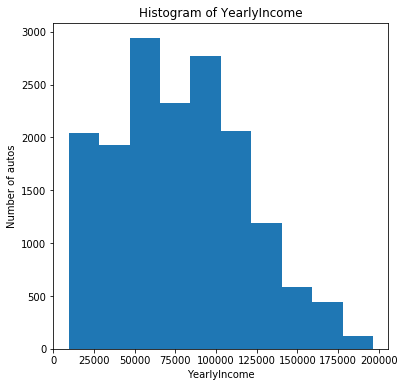

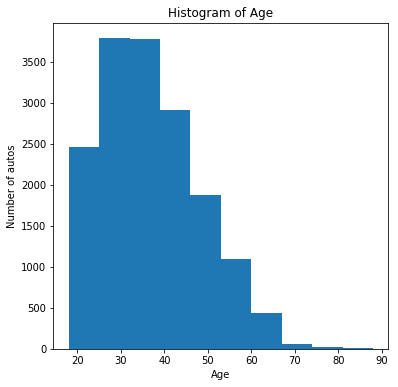

In [37]:
#1D Distribution
def plot_histogram(df, cols, bins = 10):
    for col in cols:
        fig = plt.figure(figsize=(6,6)) # define plot area
        ax = fig.gca() # define axis    
        df[col].plot.hist(ax = ax, bins = bins) # Use the plot.hist method on subset of the data frame
        ax.set_title('Histogram of ' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel('Number of autos')# Set text for y axis
        plt.show()
        
num_cols = ['YearlyIncome', 'Age']    
plot_histogram(df, num_cols)

C:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


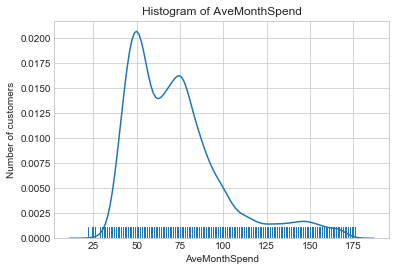

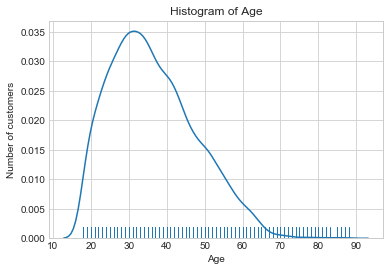

In [38]:
#kde and rug plots
def plot_density_hist(df, cols, bins = 10, hist = False):
    for col in cols:
        sns.set_style("whitegrid")
        sns.distplot(df[col], bins = bins, rug=True, hist = hist)
        plt.title('Histogram of ' + col) # Give the plot a main title
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel('Number of customers')# Set text for y axis
        plt.show()
        
num_cols = ['AveMonthSpend', 'Age']         
plot_density_hist(df, num_cols)  

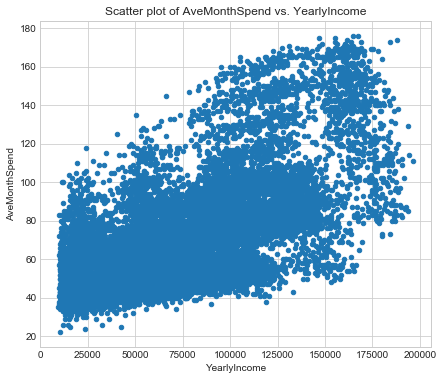

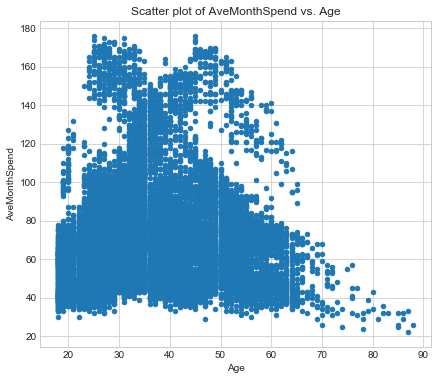

In [39]:
def plot_scatter(df, cols, col_y = 'AveMonthSpend'):
    for col in cols:
        fig = plt.figure(figsize=(7,6)) # define plot area
        ax = fig.gca() # define axis   
        df.plot.scatter(x = col, y = col_y, ax = ax)
        ax.set_title('Scatter plot of ' + col_y + ' vs. ' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel(col_y)# Set text for y axis
        plt.show()

num_cols = ['YearlyIncome','Age']
plot_scatter(df, num_cols)  

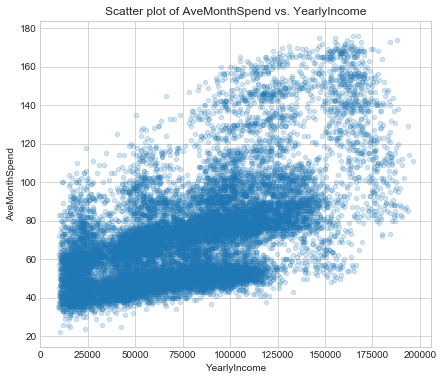

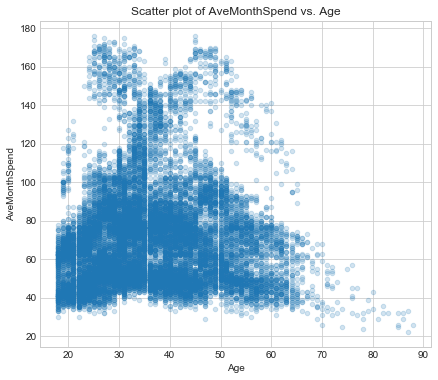

In [40]:
def plot_scatter_t(df, cols, col_y = 'AveMonthSpend', alpha = 1.0):
    for col in cols:
        fig = plt.figure(figsize=(7,6)) # define plot area
        ax = fig.gca() # define axis   
        df.plot.scatter(x = col, y = col_y, ax = ax, alpha = alpha)
        ax.set_title('Scatter plot of ' + col_y + ' vs. ' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel(col_y)# Set text for y axis
        plt.show()
num_cols = ['YearlyIncome','Age']
plot_scatter_t(df, num_cols, alpha = 0.2)       

C:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


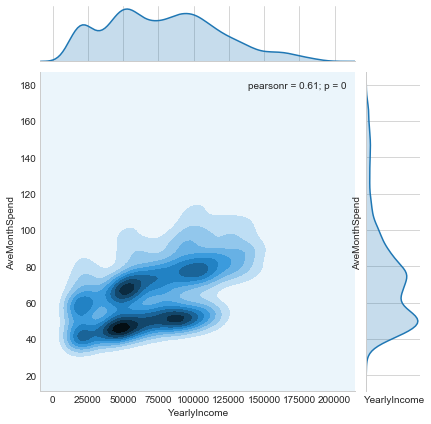

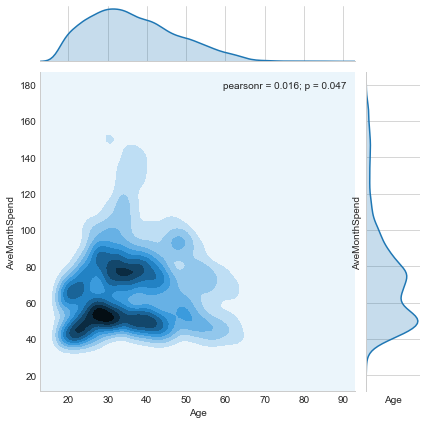

In [41]:
def plot_desity_2d(df, cols, col_y = 'AveMonthSpend', kind ='kde'):#kind ='kde',kind = 'hex'
    for col in cols:
        sns.set_style("whitegrid")
        sns.jointplot(col, col_y, data=df, kind=kind)
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.show()
        
num_cols = ['YearlyIncome','Age']
plot_desity_2d(df, num_cols)    

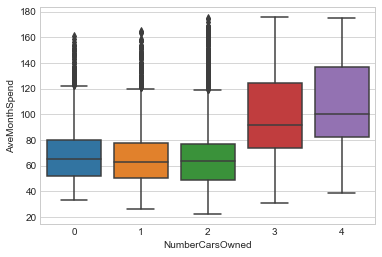

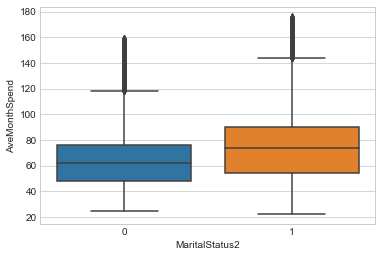

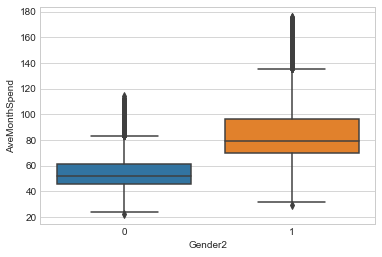

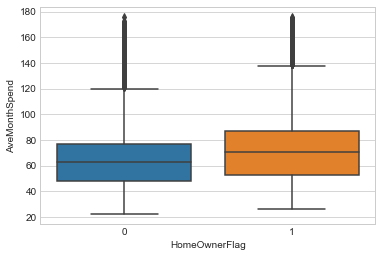

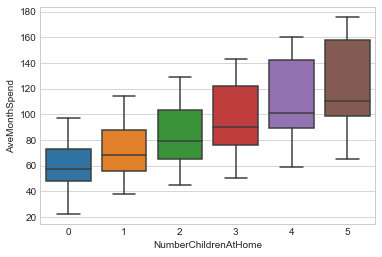

In [42]:
def plot_box(df, cols, col_y= 'AveMonthSpend'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.boxplot(col, col_y, data=df)
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y,)# Set text for y axis
        plt.show()
        
#Creating new feature for visualization purpose
MaritalStatus2 = pd.get_dummies(df['MaritalStatus'],drop_first=False)
Gender2 = pd.get_dummies(df['Gender'],drop_first=False)
df['Gender2']=Gender2['M']
df['MaritalStatus2']=MaritalStatus2['M']


num_cols = ['NumberCarsOwned','MaritalStatus2','Gender2','HomeOwnerFlag','NumberChildrenAtHome']#
plot_box(df, num_cols)


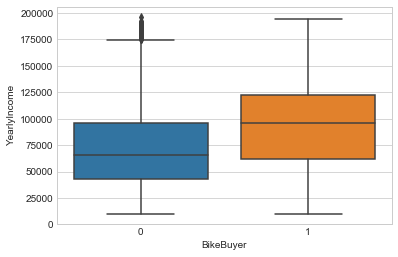

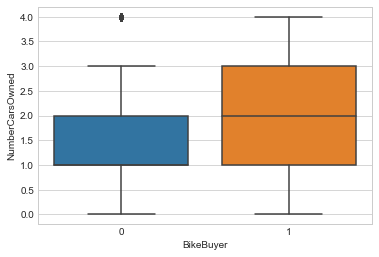

In [43]:
def plot_box(df, cols, col_x= 'BikeBuyer'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.boxplot(col_x, col, data=df)
        plt.xlabel(col_x) # Set text for the x axis
        plt.ylabel(col)# Set text for y axis
        plt.show()
        
#Next we represent Sex and Embarked columns with numbers instead
MaritalStatus2 = pd.get_dummies(df['MaritalStatus'],drop_first=False)
Gender2 = pd.get_dummies(df['Gender'],drop_first=False)
df['Gender2']=Gender2['M']
df['MaritalStatus2']=MaritalStatus2['M']


num_cols = ['YearlyIncome','NumberCarsOwned']
plot_box(df, num_cols)

C:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


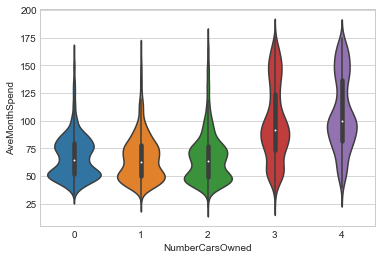

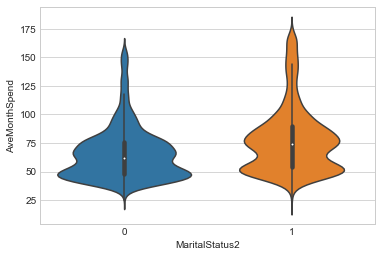

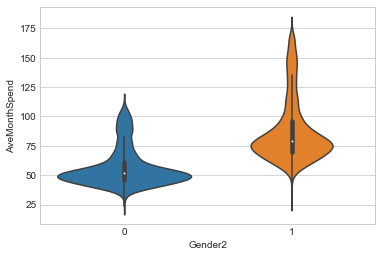

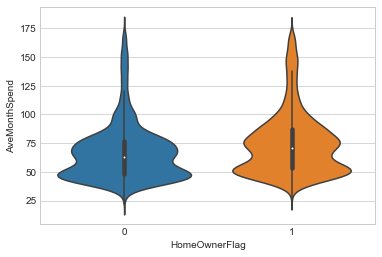

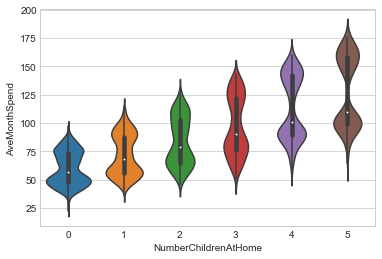

In [44]:
def plot_violin(df, cols, col_y = 'AveMonthSpend'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.violinplot(col, col_y, data=df)
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.show()
num_cols = ['NumberCarsOwned','MaritalStatus2','Gender2','HomeOwnerFlag','NumberChildrenAtHome']
plot_violin(df, num_cols)

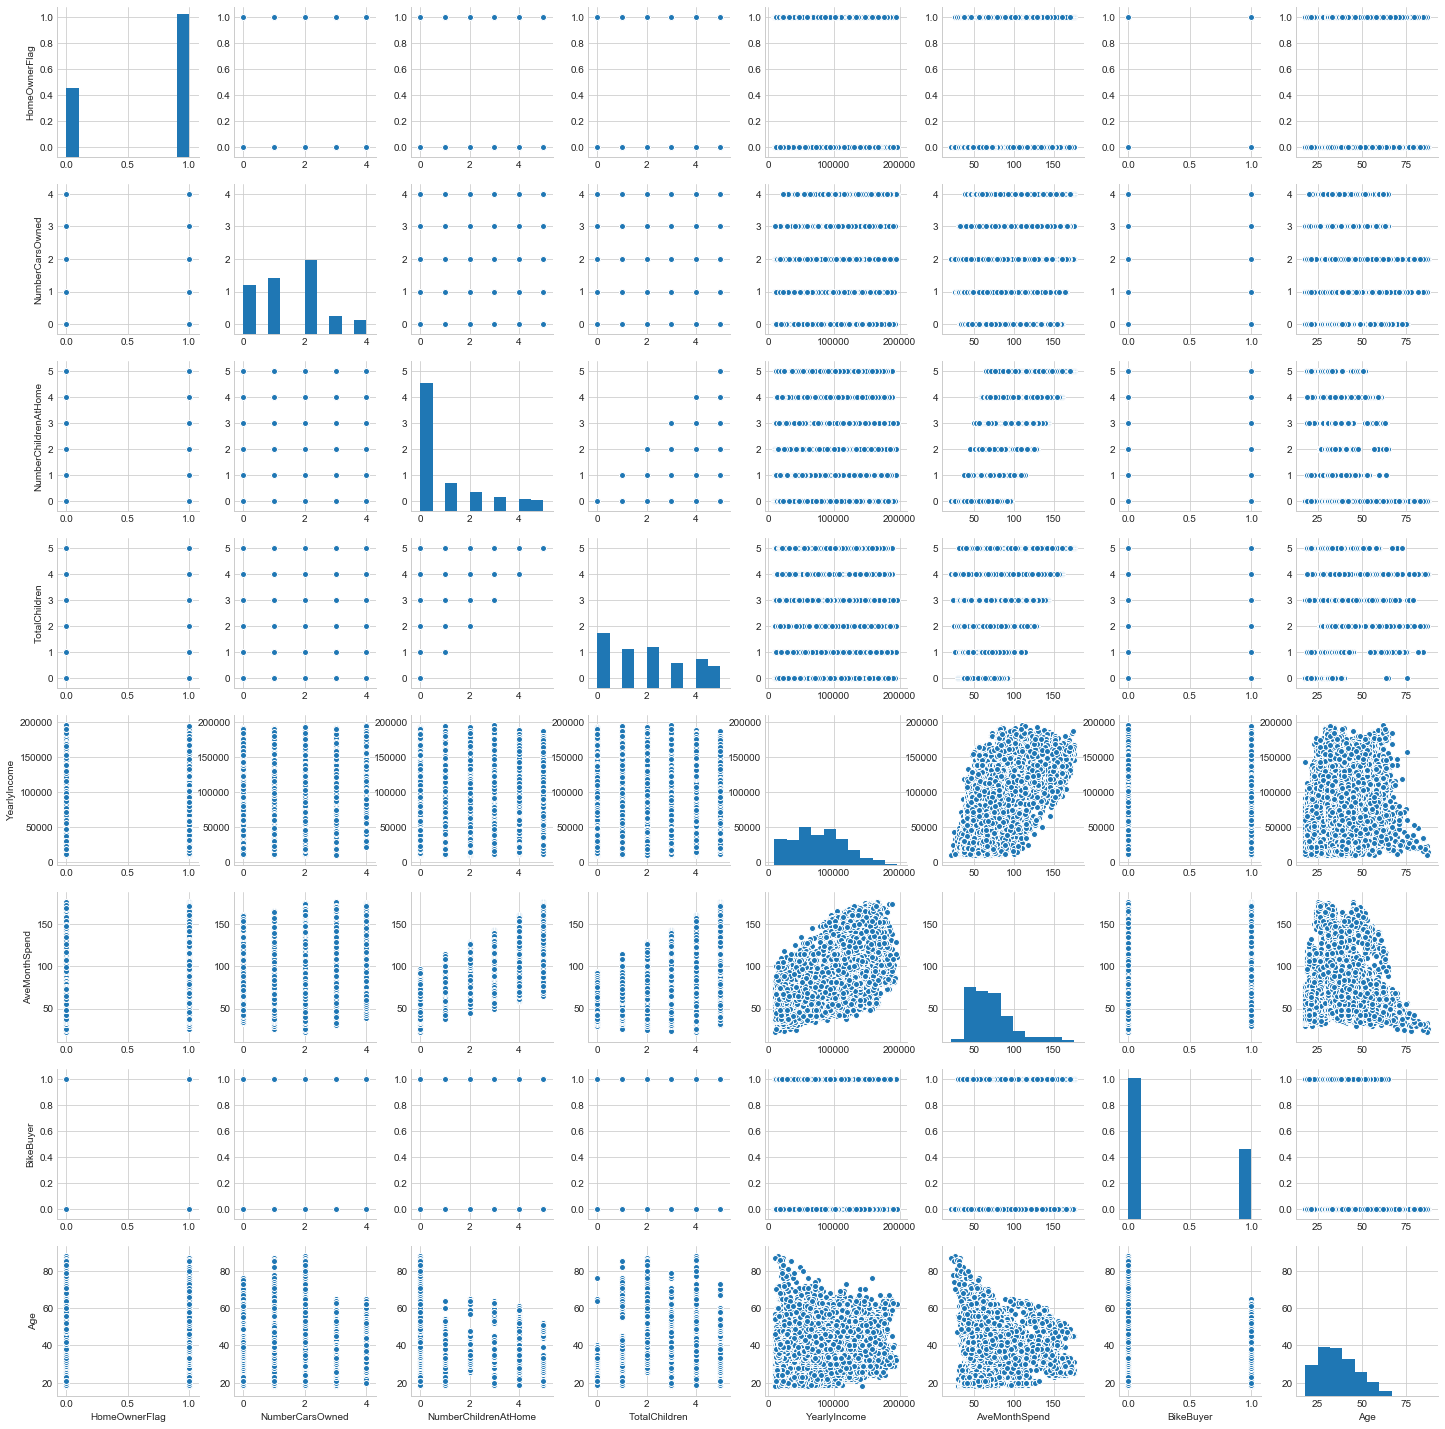

In [45]:
#Pairplot will allow us to chech the correlation between features, useful tool for feature selection
sns.pairplot(df[['HomeOwnerFlag', 'NumberCarsOwned', 'NumberChildrenAtHome',
       'TotalChildren', 'YearlyIncome', 'AveMonthSpend', 'BikeBuyer', 'Age']])

'BikeBuyer'

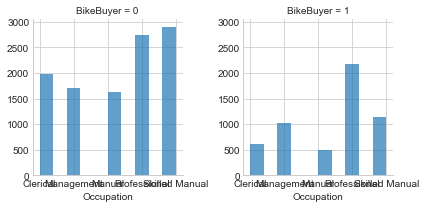

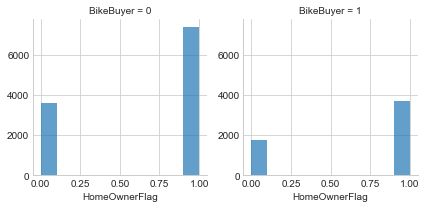

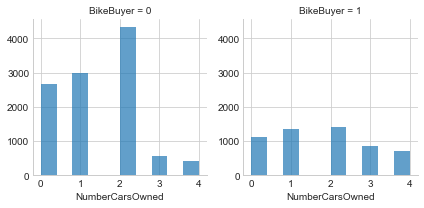

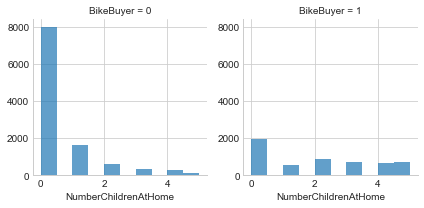

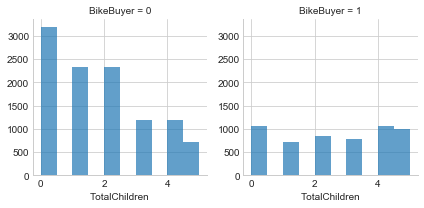

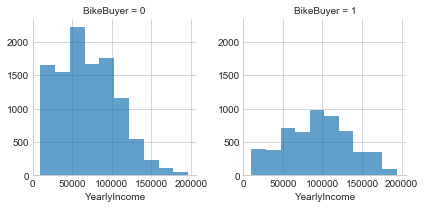

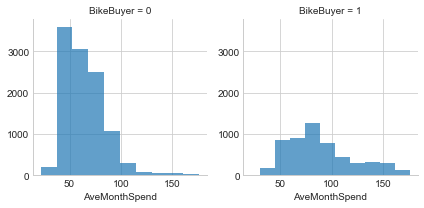

In [46]:
## Function to plot conditioned histograms
def cond_hists(df, plot_cols, grid_col):
    import matplotlib.pyplot as plt
    import seaborn as sns
    ## Loop over the list of columns
    for col in plot_cols:
        grid1 = sns.FacetGrid(df, col=grid_col)
        grid1.map(plt.hist, col, alpha=.7)
    return grid_col

## Define columns for making a conditioned histogram
plot_cols2 = ['Occupation','HomeOwnerFlag', 'NumberCarsOwned', 'NumberChildrenAtHome',
       'TotalChildren', 'YearlyIncome', 'AveMonthSpend']
cond_hists(df, plot_cols2, 'BikeBuyer')

## Data preparation

Data preparation process includes the following:

- feature selection
- feature eng
- Encoding categorical variables as binary dummy variables.
- Aggregating categories of certain categorical variables.
- Standardizing numeric variables
- Cross-varidation 
- scaling 
- splitting

In [47]:
#coding object feature to numerics

MaritalStatus2 = pd.get_dummies(df['MaritalStatus'],drop_first=False)
Gender2 = pd.get_dummies(df['Gender'],drop_first=False)
Occupation2 = pd.get_dummies(df['Occupation'],drop_first=False)
Education2 = pd.get_dummies(df['Education'],drop_first=False)

In [48]:
#Next, we  concatenate the rest of our data with the new created columns
df = pd.concat([df,Occupation2,Education2],axis=1)
df.head()


,CustomerID,FirstName,LastName,AddressLine1,City,StateProvinceName,CountryRegionName,PostalCode,PhoneNumber,BirthDate,...,Clerical,Management,Manual,Professional,Skilled Manual,Bachelors,Graduate Degree,High School,Partial College,Partial High School
0,11000,Jon,Yang,3761 N. 14th St,Rockhampton,Queensland,Australia,4700,1 (11) 500 555-0162,1966-04-08,...,0,0,0,1,0,1,0,0,0,0
1,11001,Eugene,Huang,2243 W St.,Seaford,Victoria,Australia,3198,1 (11) 500 555-0110,1965-05-14,...,0,0,0,1,0,1,0,0,0,0
2,11002,Ruben,Torres,5844 Linden Land,Hobart,Tasmania,Australia,7001,1 (11) 500 555-0184,1965-08-12,...,0,0,0,1,0,1,0,0,0,0
3,11003,Christy,Zhu,1825 Village Pl.,North Ryde,New South Wales,Australia,2113,1 (11) 500 555-0162,1968-02-15,...,0,0,0,1,0,1,0,0,0,0
4,11004,Elizabeth,Johnson,7553 Harness Circle,Wollongong,New South Wales,Australia,2500,1 (11) 500 555-0131,1968-08-08,...,0,0,0,1,0,1,0,0,0,0


In [49]:
#Feature selection/ we drop features we do not need for traing our model

df.drop(['CustomerID', 'FirstName', 'LastName', 'AddressLine1', 'City',
       'StateProvinceName', 'CountryRegionName', 'PostalCode', 'PhoneNumber',
       'BirthDate','Occupation','Education','Gender', 'MaritalStatus','BikeBuyer'],axis=1,inplace=True)

In [50]:
#Cross-varidation

#Importing  tools to split out our data into traing and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('AveMonthSpend',axis=1), 
                                                    df['AveMonthSpend'], test_size=0.30, 
                                                    random_state=101)

In [51]:
#Standardizing numeric variables(turning features and labels to numpy arrays)

X_train=np.asarray(X_train)
X_test=np.asarray(X_test)
y_train=np.asarray(y_train)
y_test=np.asarray(y_test)

In [52]:
#Data scaling

from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#scaler.fit(X_train)  
#X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test) 



## Building Machine Learning Model

In [53]:
#Importing learning Algorithms
from sklearn import linear_model
from sklearn import tree
import sklearn.metrics as sklm
import math


In [54]:
## define and fit the linear regression model

lin_mod = clf =linear_model.LinearRegression(fit_intercept = True)#tree.DecisionTreeRegressor()
lin_mod.fit(X_train, y_train)

  # save the model to disk
from sklearn.externals import joblib
filename = 'lin_mod'
joblib.dump(lin_mod, filename)

['lin_mod']

## Evaluating the Model

In [55]:
print(lin_mod.intercept_)#intercept
print(lin_mod.coef_)#model coeficient

32.13912888070816
[-1.05487971e-01 -3.57857925e-01  1.07519028e+01  3.87451408e-01
  2.14284010e-04 -1.40233713e-01  2.79961381e+01  6.22334989e+00
  8.31523299e-01 -2.00593617e+00 -2.16155753e-01  6.63513893e-01
  7.27054730e-01  5.01214549e-01 -1.58383555e+00  4.71339100e-01
  5.38941440e-01  7.23404632e-02]


In [56]:
#computing model errors, R^2 and Adjusted R^2
#-----------------------------------------------
#The RMSE, MAE and median absolute error are all small and in a similar range.This indicate good results 
#Also, notice that the R^2 and Adjusted R^2 are closer,this means our model is not overfitting.

def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and then adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
   
y_predicted = lin_mod.predict(X_test) 

print_metrics(y_test, y_predicted,19)  

Mean Square Error      = 40.379073948305006
Root Mean Square Error = 6.354453080187548
Mean Absolute Error    = 4.853496303296292
Median Absolute Error  = 3.893407751133452
R^2                    = 0.9471779348198264
Adjusted R^2           = 0.9469840133078453


C:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


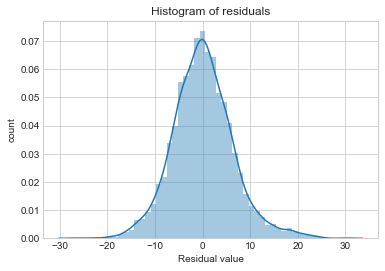

In [57]:
#histogram of the residuals (residuals are normally distributed)
#The more the residuals are closer to zero, the best our model is!

def hist_resids(y_test, y_predicted):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_predicted.reshape(-1,1))
    ## now make the residual plots
    sns.distplot(resids)
    plt.title('Histogram of residuals')
    plt.xlabel('Residual value')
    plt.ylabel('count')
    
hist_resids(y_test, y_predicted)  

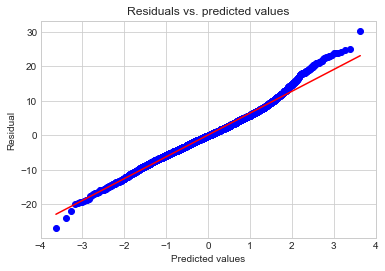

In [58]:
# the Q-Q Normal plot (as well indicates the residuals are close to Normally distributed)

import scipy.stats as ss
def resid_qq(y_test, y_predicted):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_predicted.reshape(-1,1))
    ## now make the residual plots
    ss.probplot(resids.flatten(), plot = plt)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')
    
resid_qq(y_test, y_predicted) 

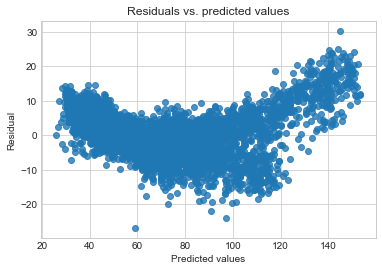

In [59]:
def resid_plot(y_test, y_predicted):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_predicted.reshape(-1,1))
    ## now make the residual plots
    sns.regplot(y_predicted, resids, fit_reg=False)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')

resid_plot(y_test, y_predicted) 

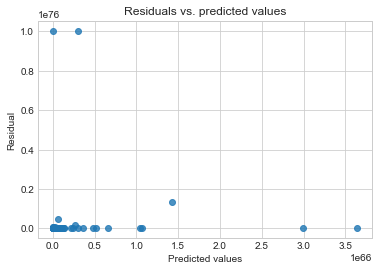

In [60]:
y_predicted_untransform = np.exp(y_predicted)
y_test_untransform = np.exp(y_test)
resid_plot(y_test_untransform, y_predicted_untransform) 

## Prepare Test Data

In [61]:
test_df = pd.read_csv('AW_test.csv')

In [62]:
test_df.head(10)

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,...,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome
0,18988,NaN,Courtney,A,Baker,NaN,8727 Buena Vista Ave.,NaN,Fremont,California,...,1/5/1945,Bachelors,Management,F,S,0,2,0,5,86931
1,29135,NaN,Adam,C,Allen,NaN,3491 Cook Street,NaN,Haney,British Columbia,...,10/4/1964,Bachelors,Skilled Manual,M,M,1,2,2,4,100125
2,12156,NaN,Bonnie,NaN,Raji,NaN,359 Pleasant Hill Rd,NaN,Burbank,California,...,1/12/1934,Graduate Degree,Management,F,M,1,2,0,4,103985
3,13749,NaN,Julio,C,Alonso,NaN,8945 Euclid Ave.,NaN,Burlingame,California,...,9/22/1958,Graduate Degree,Skilled Manual,M,M,1,0,0,4,127161
4,27780,NaN,Christy,A,Andersen,NaN,"42, boulevard Tremblay",NaN,Dunkerque,Nord,...,3/19/1965,High School,Manual,F,M,1,1,2,2,21876
5,16375,NaN,Gabriella,NaN,Hernandez,NaN,5689 Almondtree Circle,NaN,Spring Valley,California,...,8/23/1957,Partial College,Clerical,F,M,1,1,0,1,44467
6,16109,NaN,Adam,K,Turner,NaN,9800 American Beauty Dr.,NaN,N. Vancouver,British Columbia,...,7/5/1964,Bachelors,Skilled Manual,M,S,1,2,2,4,77702
7,15606,NaN,Marco,C,Prasad,NaN,8523 Rose Drive,C,Cranbourne,Victoria,...,12/11/1964,Bachelors,Professional,M,M,1,3,4,4,99418
8,20888,NaN,Clayton,P,Raje,NaN,"4, place du Tertre",NaN,Tremblay-en-France,Seine Saint Denis,...,1/21/1966,Partial High School,Manual,M,S,1,1,4,4,13522
9,20716,NaN,Kristina,V,Arun,NaN,Waldstr 29,NaN,Hannover,Nordrhein-Westfalen,...,9/13/1973,Bachelors,Skilled Manual,F,M,1,1,1,1,46264


In [63]:
#Let us see how many duplicates we have
#Features['CustomerID'].value_counts()
print(test_df.shape)
print(test_df.CustomerID.unique().shape)

(500, 23)
(500,)


In [64]:
# Droping duplicates
test_df.drop_duplicates(subset = 'CustomerID', keep = 'last', inplace = True)#keep= 'first' or 'last'
print(test_df.shape)
print(test_df.CustomerID.unique().shape)

(500, 23)
(500,)


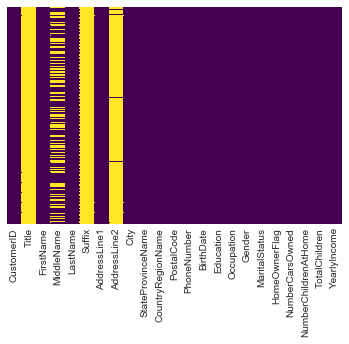

In [65]:
#Dealing with missing value
#(Features.astype(np.object) == 'NaN').any()
sns.heatmap(test_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [66]:
#dropping columns with missing values
test_df.drop(['Title','MiddleName','Suffix','AddressLine2'],axis=1,inplace=True)

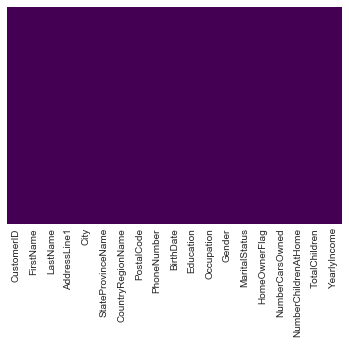

In [67]:
#double checking on the rest of data
sns.heatmap(test_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [68]:
#Creating a new column (Feature)
test_df['Age']=[(1998- int(x[-4:]))for x in test_df['BirthDate'] ]

In [69]:
test_df.head()

,CustomerID,FirstName,LastName,AddressLine1,City,StateProvinceName,CountryRegionName,PostalCode,PhoneNumber,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,Age
0,18988,Courtney,Baker,8727 Buena Vista Ave.,Fremont,California,United States,94536,133-555-0128,1/5/1945,Bachelors,Management,F,S,0,2,0,5,86931,53
1,29135,Adam,Allen,3491 Cook Street,Haney,British Columbia,Canada,V2W 1W2,252-555-0173,10/4/1964,Bachelors,Skilled Manual,M,M,1,2,2,4,100125,34
2,12156,Bonnie,Raji,359 Pleasant Hill Rd,Burbank,California,United States,91502,409-555-0193,1/12/1934,Graduate Degree,Management,F,M,1,2,0,4,103985,64
3,13749,Julio,Alonso,8945 Euclid Ave.,Burlingame,California,United States,94010,175-555-0196,9/22/1958,Graduate Degree,Skilled Manual,M,M,1,0,0,4,127161,40
4,27780,Christy,Andersen,"42, boulevard Tremblay",Dunkerque,Nord,France,59140,1 (11) 500 555-0122,3/19/1965,High School,Manual,F,M,1,1,2,2,21876,33


In [70]:
#coding object feature to numerics

MaritalStatus2 = pd.get_dummies(test_df['MaritalStatus'],drop_first=False)
Gender2 = pd.get_dummies(test_df['Gender'],drop_first=False)
Occupation2 = pd.get_dummies(test_df['Occupation'],drop_first=False)
Education2 = pd.get_dummies(test_df['Education'],drop_first=False)

test_df['Gender2']=Gender2['M']
test_df['MaritalStatus2']=MaritalStatus2['M']



In [71]:
CustomerID=test_df['CustomerID']

In [72]:
#Next, we  concatinate the rest of our data with the new created columns on Sex and Embarked
test_df = pd.concat([test_df,Occupation2,Education2],axis=1)
test_df.head()

,CustomerID,FirstName,LastName,AddressLine1,City,StateProvinceName,CountryRegionName,PostalCode,PhoneNumber,BirthDate,...,Clerical,Management,Manual,Professional,Skilled Manual,Bachelors,Graduate Degree,High School,Partial College,Partial High School
0,18988,Courtney,Baker,8727 Buena Vista Ave.,Fremont,California,United States,94536,133-555-0128,1/5/1945,...,0,1,0,0,0,1,0,0,0,0
1,29135,Adam,Allen,3491 Cook Street,Haney,British Columbia,Canada,V2W 1W2,252-555-0173,10/4/1964,...,0,0,0,0,1,1,0,0,0,0
2,12156,Bonnie,Raji,359 Pleasant Hill Rd,Burbank,California,United States,91502,409-555-0193,1/12/1934,...,0,1,0,0,0,0,1,0,0,0
3,13749,Julio,Alonso,8945 Euclid Ave.,Burlingame,California,United States,94010,175-555-0196,9/22/1958,...,0,0,0,0,1,0,1,0,0,0
4,27780,Christy,Andersen,"42, boulevard Tremblay",Dunkerque,Nord,France,59140,1 (11) 500 555-0122,3/19/1965,...,0,0,1,0,0,0,0,1,0,0


In [73]:
#Feature selection
test_df.drop(['CustomerID', 'FirstName', 'LastName', 'AddressLine1', 'City',
       'StateProvinceName', 'CountryRegionName', 'PostalCode', 'PhoneNumber',
       'BirthDate', 'Occupation','Education','Gender', 'MaritalStatus'],axis=1,inplace=True)

In [74]:
#Standardizing numeric variables(turning features and labels to numpy arrays)

test_df=np.asarray(test_df)


In [75]:

#Data scaling
from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#scaler.fit(test_df)  
#test_df = scaler.transform(test_df) 

## Save and Test  the model on Test Data

In [76]:
from sklearn.externals import joblib


predicted_amount=[]   #list to store predicted amount
line=0
for line in range(test_df.shape[0]): #For every customer load the model and predict the lebel
        loaded_model = joblib.load('lin_mod')
        predicted =loaded_model.predict(test_df[line:line+1,:])
        predicted_amount.append(predicted)
        line+=line

from itertools import chain
mylebels=list(chain.from_iterable(predicted_amount))# put all the prediction together
            
submission=pd.DataFrame({'ID':CustomerID, 'predicted_amount':mylebels})# forming  data frame of both id and labels
submission.sort_values(by='ID', ascending=False)
submission.to_csv('submission_format2',index=False)
submission.to_excel(pd.ExcelWriter('submission_format2.xlsx'),'Sheet1',index=False)

In [77]:
loaded_model = joblib.load('lin_mod')
predX =loaded_model.predict(test_df[2:3])
print(predX)


[48.80867396]


In [78]:
df1=pd.read_csv('submission_format2')
print(df1['predicted_amount'])

0       43.051485
1      106.506534
2       48.808674
3       88.585374
4       60.492989
5       43.436034
6       95.478294
7      127.437442
8      102.495592
9       56.674549
10      58.959013
11      50.663565
12      72.790876
13      46.421092
14      38.187633
15      51.372972
16      85.832131
17      72.994208
18     112.288686
19      59.349936
20      68.599773
21      76.106994
22     149.481156
23      84.961821
24      55.501833
25      75.014846
26      86.918250
27     116.872206
28      77.745213
29      61.965329
          ...    
470     48.038808
471     89.476220
472     93.775528
473     47.581695
474     60.146384
475     68.174741
476     67.841595
477    136.684925
478    130.261378
479    127.629867
480    130.756972
481     81.530990
482    111.781207
483     74.590106
484     72.962527
485     28.448748
486    146.176612
487     50.100247
488     87.978021
489     91.824598
490     73.134200
491    100.888108
492    138.107471
493     78.048359
494     57

## Conclusion

In this challenge, several data mining techniques extending from Exploration data analysis, Data visualization to Data preparation were combined to building a regression Machine Learning Model. The model perfomence on training dataset  was 94% considering Adjusted R^2().The regression model then deployed to new unseen dataset (test dataset) come up with 95% of the accuracy.